
[FRA - Milestone 1](#Problem_1)
    
<font color=darkblue> Businesses or companies can fall prey to default if they are not able to keep up their debt obligations.
Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.
 </font> 

[FRA - Milestone 2](#Problem_2)
    
<font color=darkblue> Comparison of models </font> 

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:black"> <u> FRA - Milestone 1
<a id='Problem_1'></a>

In [3]:
#Import necessary Libraries


import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as SM
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, plot_confusion_matrix #Model Evaluation technique
from sklearn.model_selection import train_test_split                           #Train-test split

%matplotlib inline  
color = sns.color_palette()

# Remove warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read the dataset
rating = pd.read_excel('Company_Data2015-1.xlsx')

#Checking the head of the dataset
rating.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [5]:
#Renaming the columns without special characters

rating.columns = rating.columns.str.replace('-', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace(',','').str.replace('[', '_').str.replace(']', '').str.replace('.', '').str.replace('Velocity', 'Vel').str.replace('earnings', 'earn').str.replace('expenses', 'exp').str.replace('Production', 'Prod')

In [6]:
#Checking for head of the dataset for new column names

rating.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [7]:
#Shape of the dataset

print('The number of rows (observations) is',rating.shape[0],'\n''The number of columns (variables) is',rating.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [8]:
#Information of the dataset

rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_to_Liabilities   

In [9]:
#Descriptive statistice of continuous variables

pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

rating.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth_Next_Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity_Paid_Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital_Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
Total_Debt,3586.0,1994.823779,23652.842746,-0.72,0.0300,7.490,72.3500,652823.81
Gross_Block,3586.0,594.178829,4871.547802,-41.19,0.5700,15.870,131.8950,128477.59
Net_Working_Capital,3586.0,410.809665,6301.218546,-13162.42,0.9425,10.145,61.1750,223257.56
Current_Assets,3586.0,1960.349172,22577.570829,-0.91,4.0000,24.540,135.2775,721166.00
Current_Liabilities_and_Provisions,3586.0,391.992078,2675.001631,-0.23,0.7325,9.225,65.6500,83232.98


In [10]:
#Creating a binary target variable for networth next year

rating['default'] = np.where((rating['Networth_Next_Year'] > 0), 0, 1)

In [11]:
#Checking for top 10 records networth next year and default column

display(rating[['default','Networth_Next_Year']].head(5),rating[['default','Networth_Next_Year']].tail(5))

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36


,default,Networth_Next_Year
3581,0,72677.77
3582,0,79162.19
3583,0,88134.31
3584,0,91293.70
3585,0,111729.10


In [12]:
#Creating a copy of rating dataset

df = rating.copy()

In [13]:
#Dropping the networth_next_year column since we have transformed it to default variable. Company code and company name 
#are also removed since they are not used for model building

df = df.drop(['Co_Code', 'Networth_Next_Year', 'Co_Name'], axis = 1)

In [14]:
#Value count and proportion of defaults

print('Value counts:')
display(df['default'].value_counts())
print('Proportion of the default:')
display((df['default'].value_counts(normalize = True)*100).round(2))

Value counts:


0    3198
1     388
Name: default, dtype: int64

Proportion of the default:


0    89.18
1    10.82
Name: default, dtype: float64

In [15]:
#Duplicate records check

dup = df.duplicated()
print('There are ',dup.sum(),' duplicate records in the dataset')

There are  0  duplicate records in the dataset


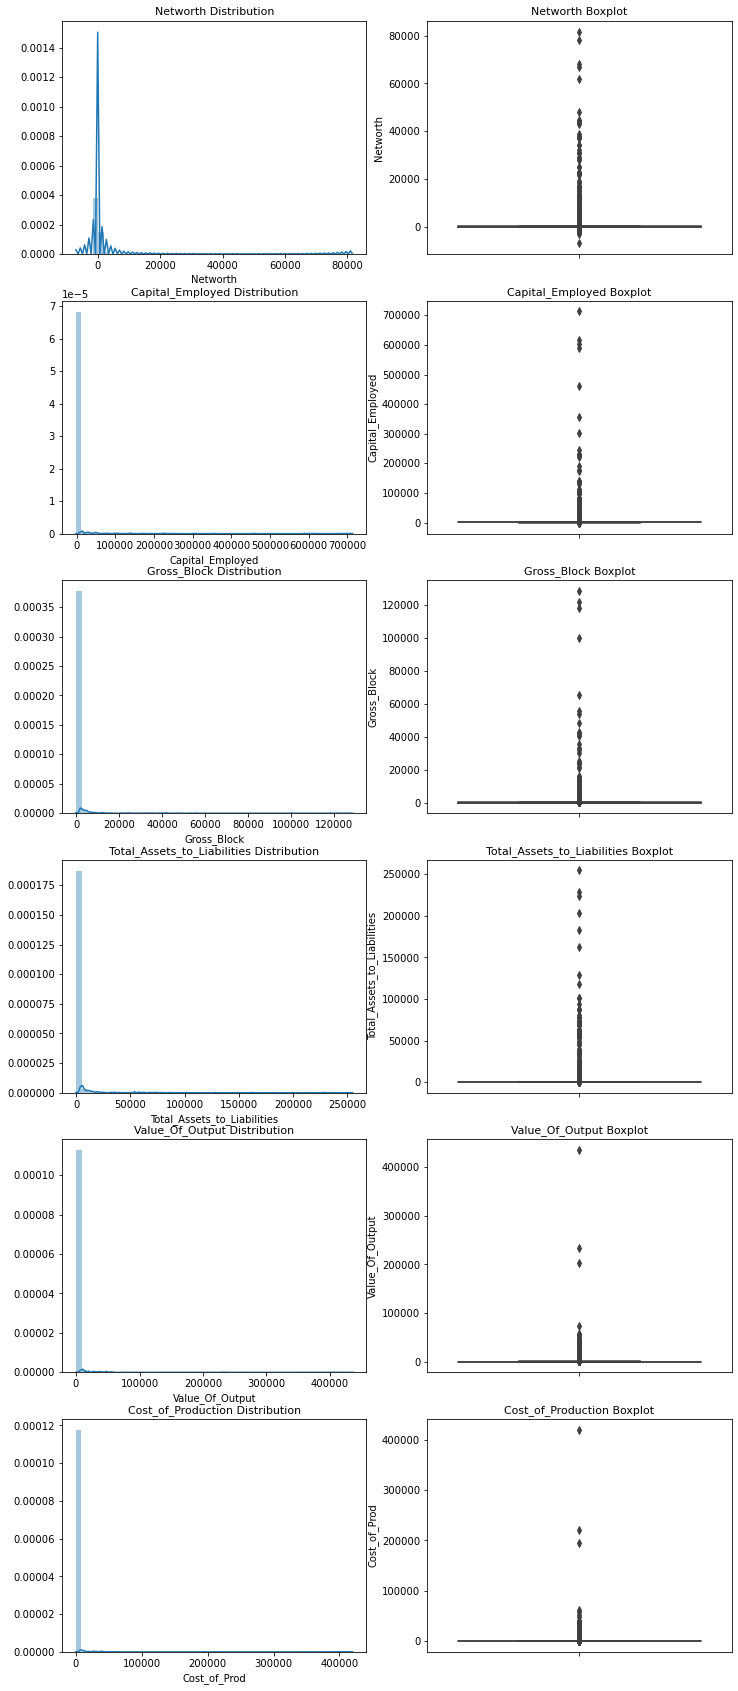

In [16]:
#Univariate analysis of the significant variables

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12, 30)

a = sns.distplot(df.Networth, ax=axes[0][0])
a.set_title("Networth Distribution",fontsize=11)
a = sns.boxplot(df.Networth , orient = "v" , ax=axes[0][1])
a.set_title("Networth Boxplot",fontsize=11)

a = sns.distplot(df.Capital_Employed, ax=axes[1][0])
a.set_title("Capital_Employed Distribution",fontsize=11)
a = sns.boxplot(df.Capital_Employed , orient = "v" , ax=axes[1][1])
a.set_title("Capital_Employed Boxplot",fontsize=11)

a = sns.distplot(df.Gross_Block, ax=axes[2][0])
a.set_title("Gross_Block Distribution",fontsize=11)
a = sns.boxplot(df.Gross_Block, orient = "v" , ax=axes[2][1])
a.set_title("Gross_Block Boxplot",fontsize=11)

a = sns.distplot(df.Total_Assets_to_Liabilities , ax=axes[3][0])
a.set_title("Total_Assets_to_Liabilities Distribution",fontsize=11)
a = sns.boxplot(df.Total_Assets_to_Liabilities , orient = "v" , ax=axes[3][1])
a.set_title("Total_Assets_to_Liabilities Boxplot",fontsize=11)

a = sns.distplot(df.Value_Of_Output , ax=axes[4][0])
a.set_title("Value_Of_Output Distribution",fontsize=11)
a = sns.boxplot(df.Value_Of_Output , orient = "v" , ax=axes[4][1])
a.set_title("Value_Of_Output Boxplot",fontsize=11)

a = sns.distplot(df.Cost_of_Prod , ax=axes[5][0])
a.set_title("Cost_of_Production Distribution",fontsize=11)
a = sns.boxplot(df.Cost_of_Prod, orient = "v" , ax=axes[5][1])
a.set_title("Cost_of_Production Boxplot",fontsize=11)

plt.show()

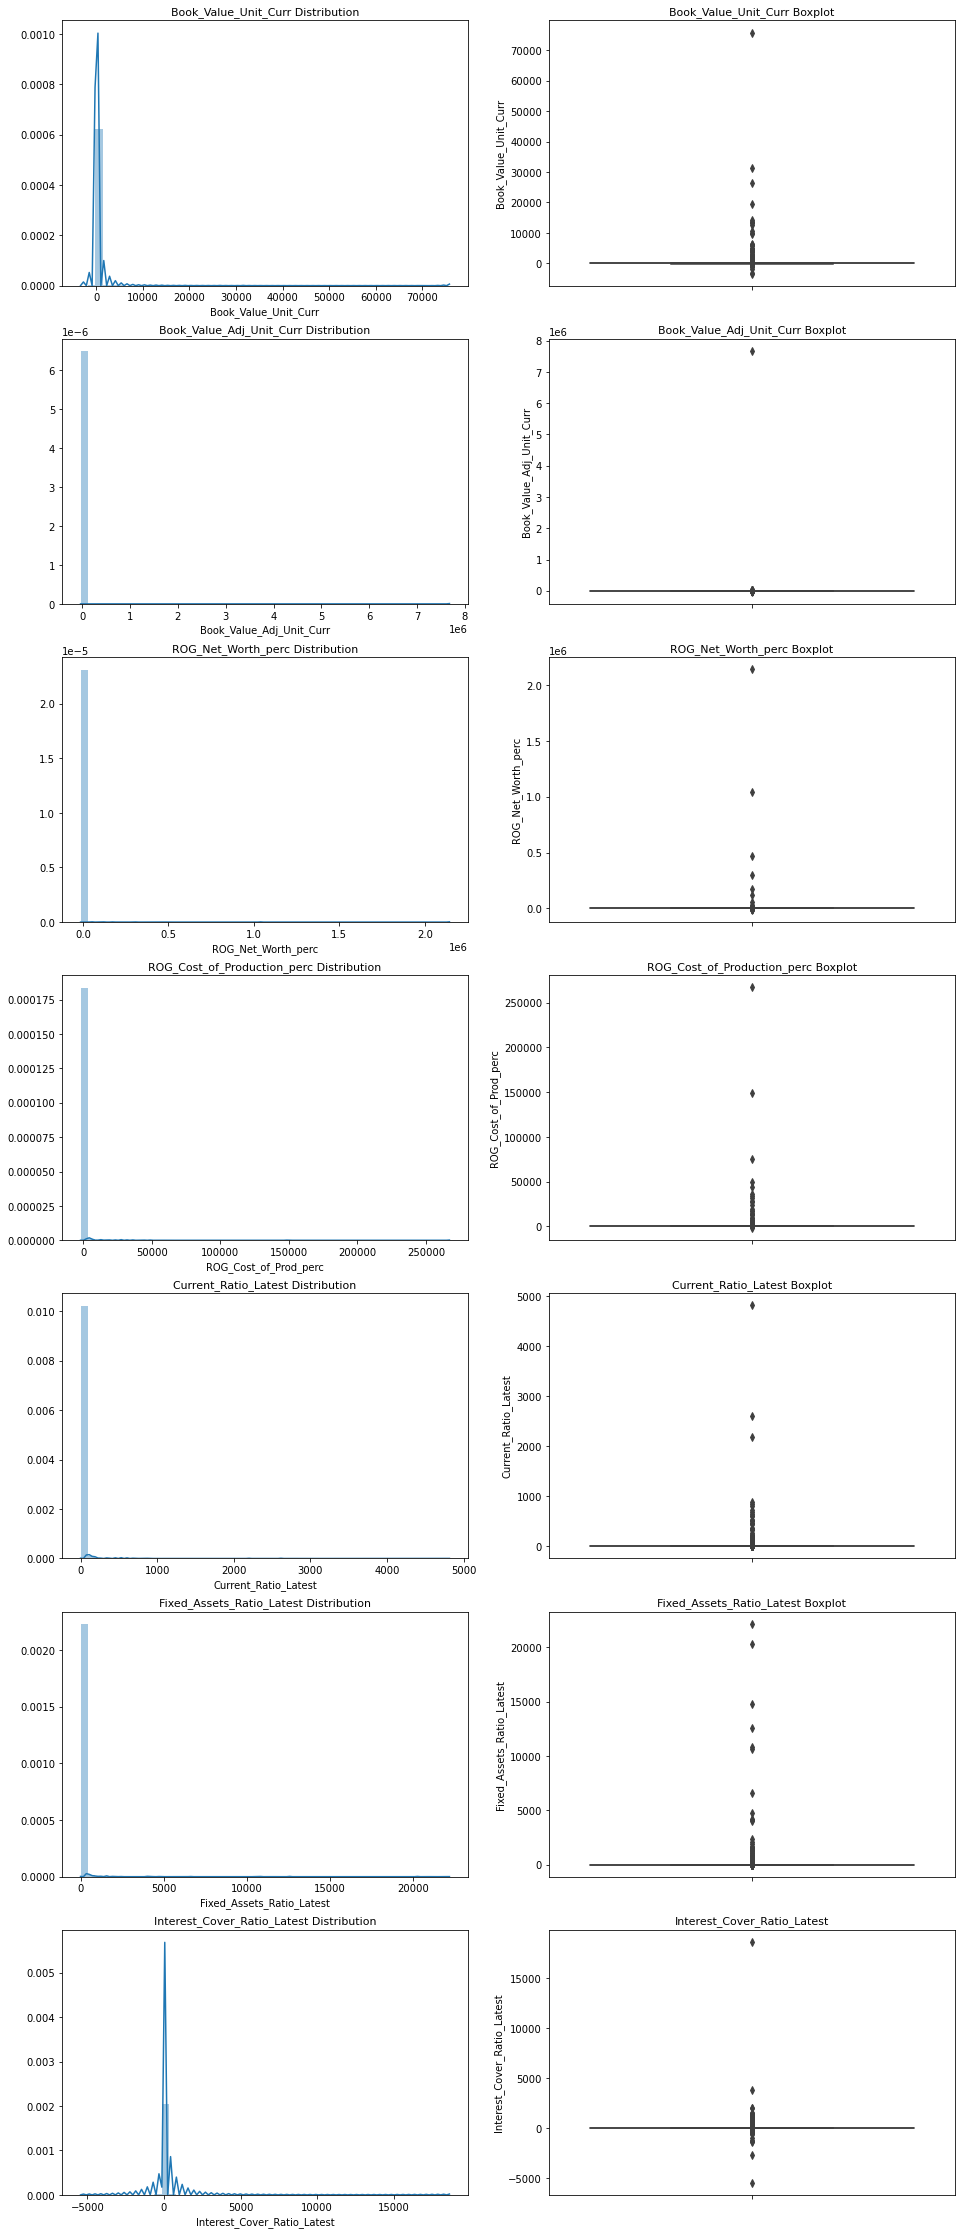

In [17]:
#Univariate analysis of the significant variables

fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(16, 40)

a = sns.distplot(df.Book_Value_Unit_Curr, ax=axes[0][0])
a.set_title("Book_Value_Unit_Curr Distribution",fontsize=11)
a = sns.boxplot(df.Book_Value_Unit_Curr , orient = "v" , ax=axes[0][1])
a.set_title("Book_Value_Unit_Curr Boxplot",fontsize=11)

a = sns.distplot(df.Book_Value_Adj_Unit_Curr, ax=axes[1][0])
a.set_title("Book_Value_Adj_Unit_Curr Distribution",fontsize=11)
a = sns.boxplot(df.Book_Value_Adj_Unit_Curr , orient = "v" , ax=axes[1][1])
a.set_title("Book_Value_Adj_Unit_Curr Boxplot",fontsize=11)

a = sns.distplot(df.ROG_Net_Worth_perc, ax=axes[2][0])
a.set_title("ROG_Net_Worth_perc Distribution",fontsize=11)
a = sns.boxplot(df.ROG_Net_Worth_perc, orient = "v" , ax=axes[2][1])
a.set_title("ROG_Net_Worth_perc Boxplot",fontsize=11)

a = sns.distplot(df.ROG_Cost_of_Prod_perc , ax=axes[3][0])
a.set_title("ROG_Cost_of_Production_perc Distribution",fontsize=11)
a = sns.boxplot(df.ROG_Cost_of_Prod_perc , orient = "v" , ax=axes[3][1])
a.set_title("ROG_Cost_of_Production_perc Boxplot",fontsize=11)

a = sns.distplot(df.Current_Ratio_Latest , ax=axes[4][0])
a.set_title("Current_Ratio_Latest Distribution",fontsize=11)
a = sns.boxplot(df.Current_Ratio_Latest , orient = "v" , ax=axes[4][1])
a.set_title("Current_Ratio_Latest Boxplot",fontsize=11)

a = sns.distplot(df.Fixed_Assets_Ratio_Latest , ax=axes[5][0])
a.set_title("Fixed_Assets_Ratio_Latest Distribution",fontsize=11)
a = sns.boxplot(df.Fixed_Assets_Ratio_Latest , orient = "v" , ax=axes[5][1])
a.set_title("Fixed_Assets_Ratio_Latest Boxplot",fontsize=11)

a = sns.distplot(df.Interest_Cover_Ratio_Latest , ax=axes[6][0])
a.set_title("Interest_Cover_Ratio_Latest Distribution",fontsize=11)
a = sns.boxplot(df.Interest_Cover_Ratio_Latest , orient = "v" , ax=axes[6][1])
a.set_title("Interest_Cover_Ratio_Latest",fontsize=11)
plt.show()

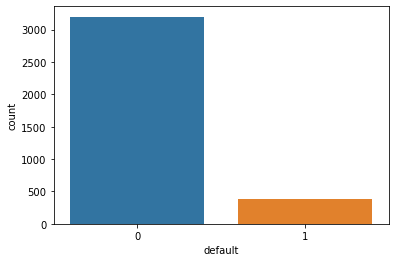

In [18]:
sns.countplot(df['default']);

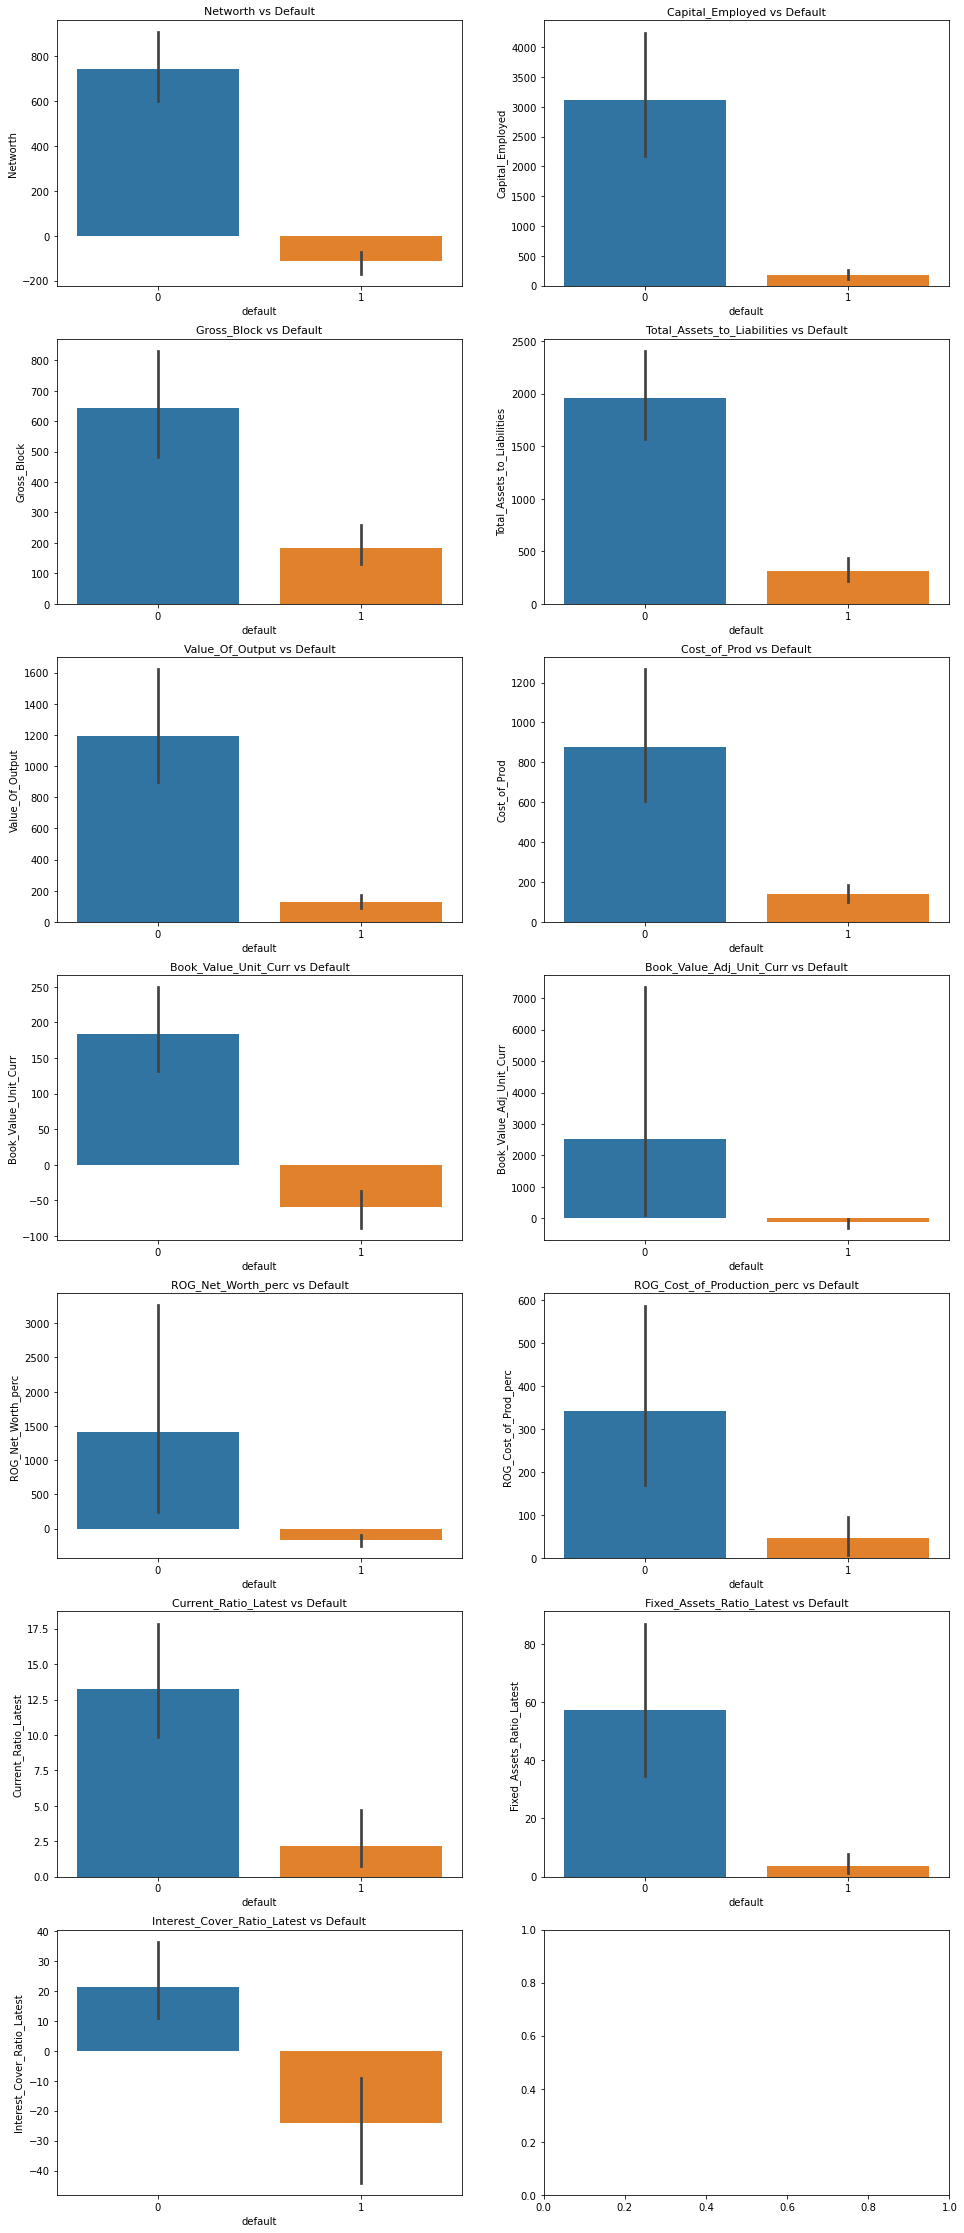

In [19]:
#Bivariate analysis of default with the significant variables

fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(16, 40)

a = sns.barplot(df['default'], df['Networth'] , ax=axes[0][0])
a.set_title("Networth vs Default",fontsize=11)

a = sns.barplot(df['default'], df['Capital_Employed'], ax=axes[0][1])
a.set_title("Capital_Employed vs Default",fontsize=11)

a = sns.barplot(df['default'], df['Gross_Block'], ax=axes[1][0])
a.set_title("Gross_Block vs Default",fontsize=11)

a = sns.barplot(df['default'], df['Total_Assets_to_Liabilities'], ax=axes[1][1])
a.set_title("Total_Assets_to_Liabilities vs Default",fontsize=11)

a = sns.barplot(df['default'], df['Value_Of_Output'] , ax=axes[2][0])
a.set_title("Value_Of_Output vs Default",fontsize=11)

a = sns.barplot(df['default'], df['Cost_of_Prod'] , ax=axes[2][1])
a.set_title("Cost_of_Prod vs Default",fontsize=11)

a = sns.barplot(df['default'], df['Book_Value_Unit_Curr'], ax=axes[3][0])
a.set_title("Book_Value_Unit_Curr vs Default",fontsize=11)

a = sns.barplot(df['default'], df['Book_Value_Adj_Unit_Curr'], ax=axes[3][1])
a.set_title("Book_Value_Adj_Unit_Curr vs Default",fontsize=11)

a = sns.barplot(df['default'], df['ROG_Net_Worth_perc'], ax=axes[4][0])
a.set_title("ROG_Net_Worth_perc vs Default",fontsize=11)

a = sns.barplot(df['default'], df['ROG_Cost_of_Prod_perc'], ax=axes[4][1])
a.set_title("ROG_Cost_of_Production_perc vs Default",fontsize=11)

a = sns.barplot(df['default'], df['Current_Ratio_Latest'], ax=axes[5][0])
a.set_title("Current_Ratio_Latest vs Default",fontsize=11)

a = sns.barplot(df['default'], df['Fixed_Assets_Ratio_Latest'], ax=axes[5][1])
a.set_title("Fixed_Assets_Ratio_Latest vs Default",fontsize=11)

a = sns.barplot(df['default'], df['Interest_Cover_Ratio_Latest'], ax=axes[6][0])
a.set_title("Interest_Cover_Ratio_Latest vs Default",fontsize=11)
plt.show()

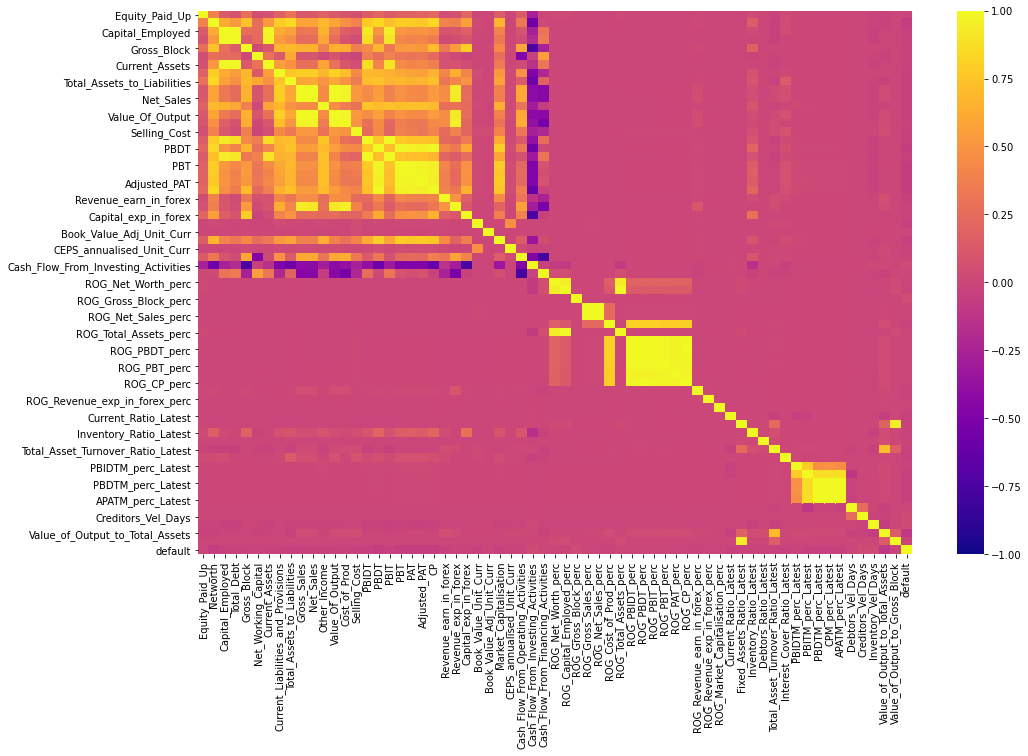

In [20]:
#Correlation plot before imputing

plt.figure(figsize = (16,10))
cor_matrix = df.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1);

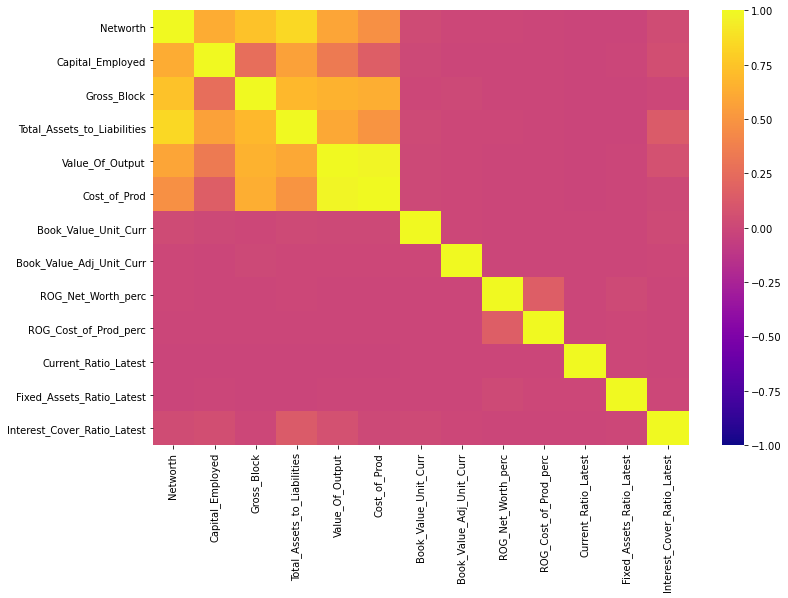

In [21]:
col = ['Networth','Capital_Employed','Gross_Block','Total_Assets_to_Liabilities','Value_Of_Output','Cost_of_Prod','Book_Value_Unit_Curr','Book_Value_Adj_Unit_Curr','ROG_Net_Worth_perc','ROG_Cost_of_Prod_perc','Current_Ratio_Latest','Fixed_Assets_Ratio_Latest','Interest_Cover_Ratio_Latest']

#Correlation plot of the significant variables

plt.figure(figsize = (12,8))
cor_matrix = df[col].corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1);


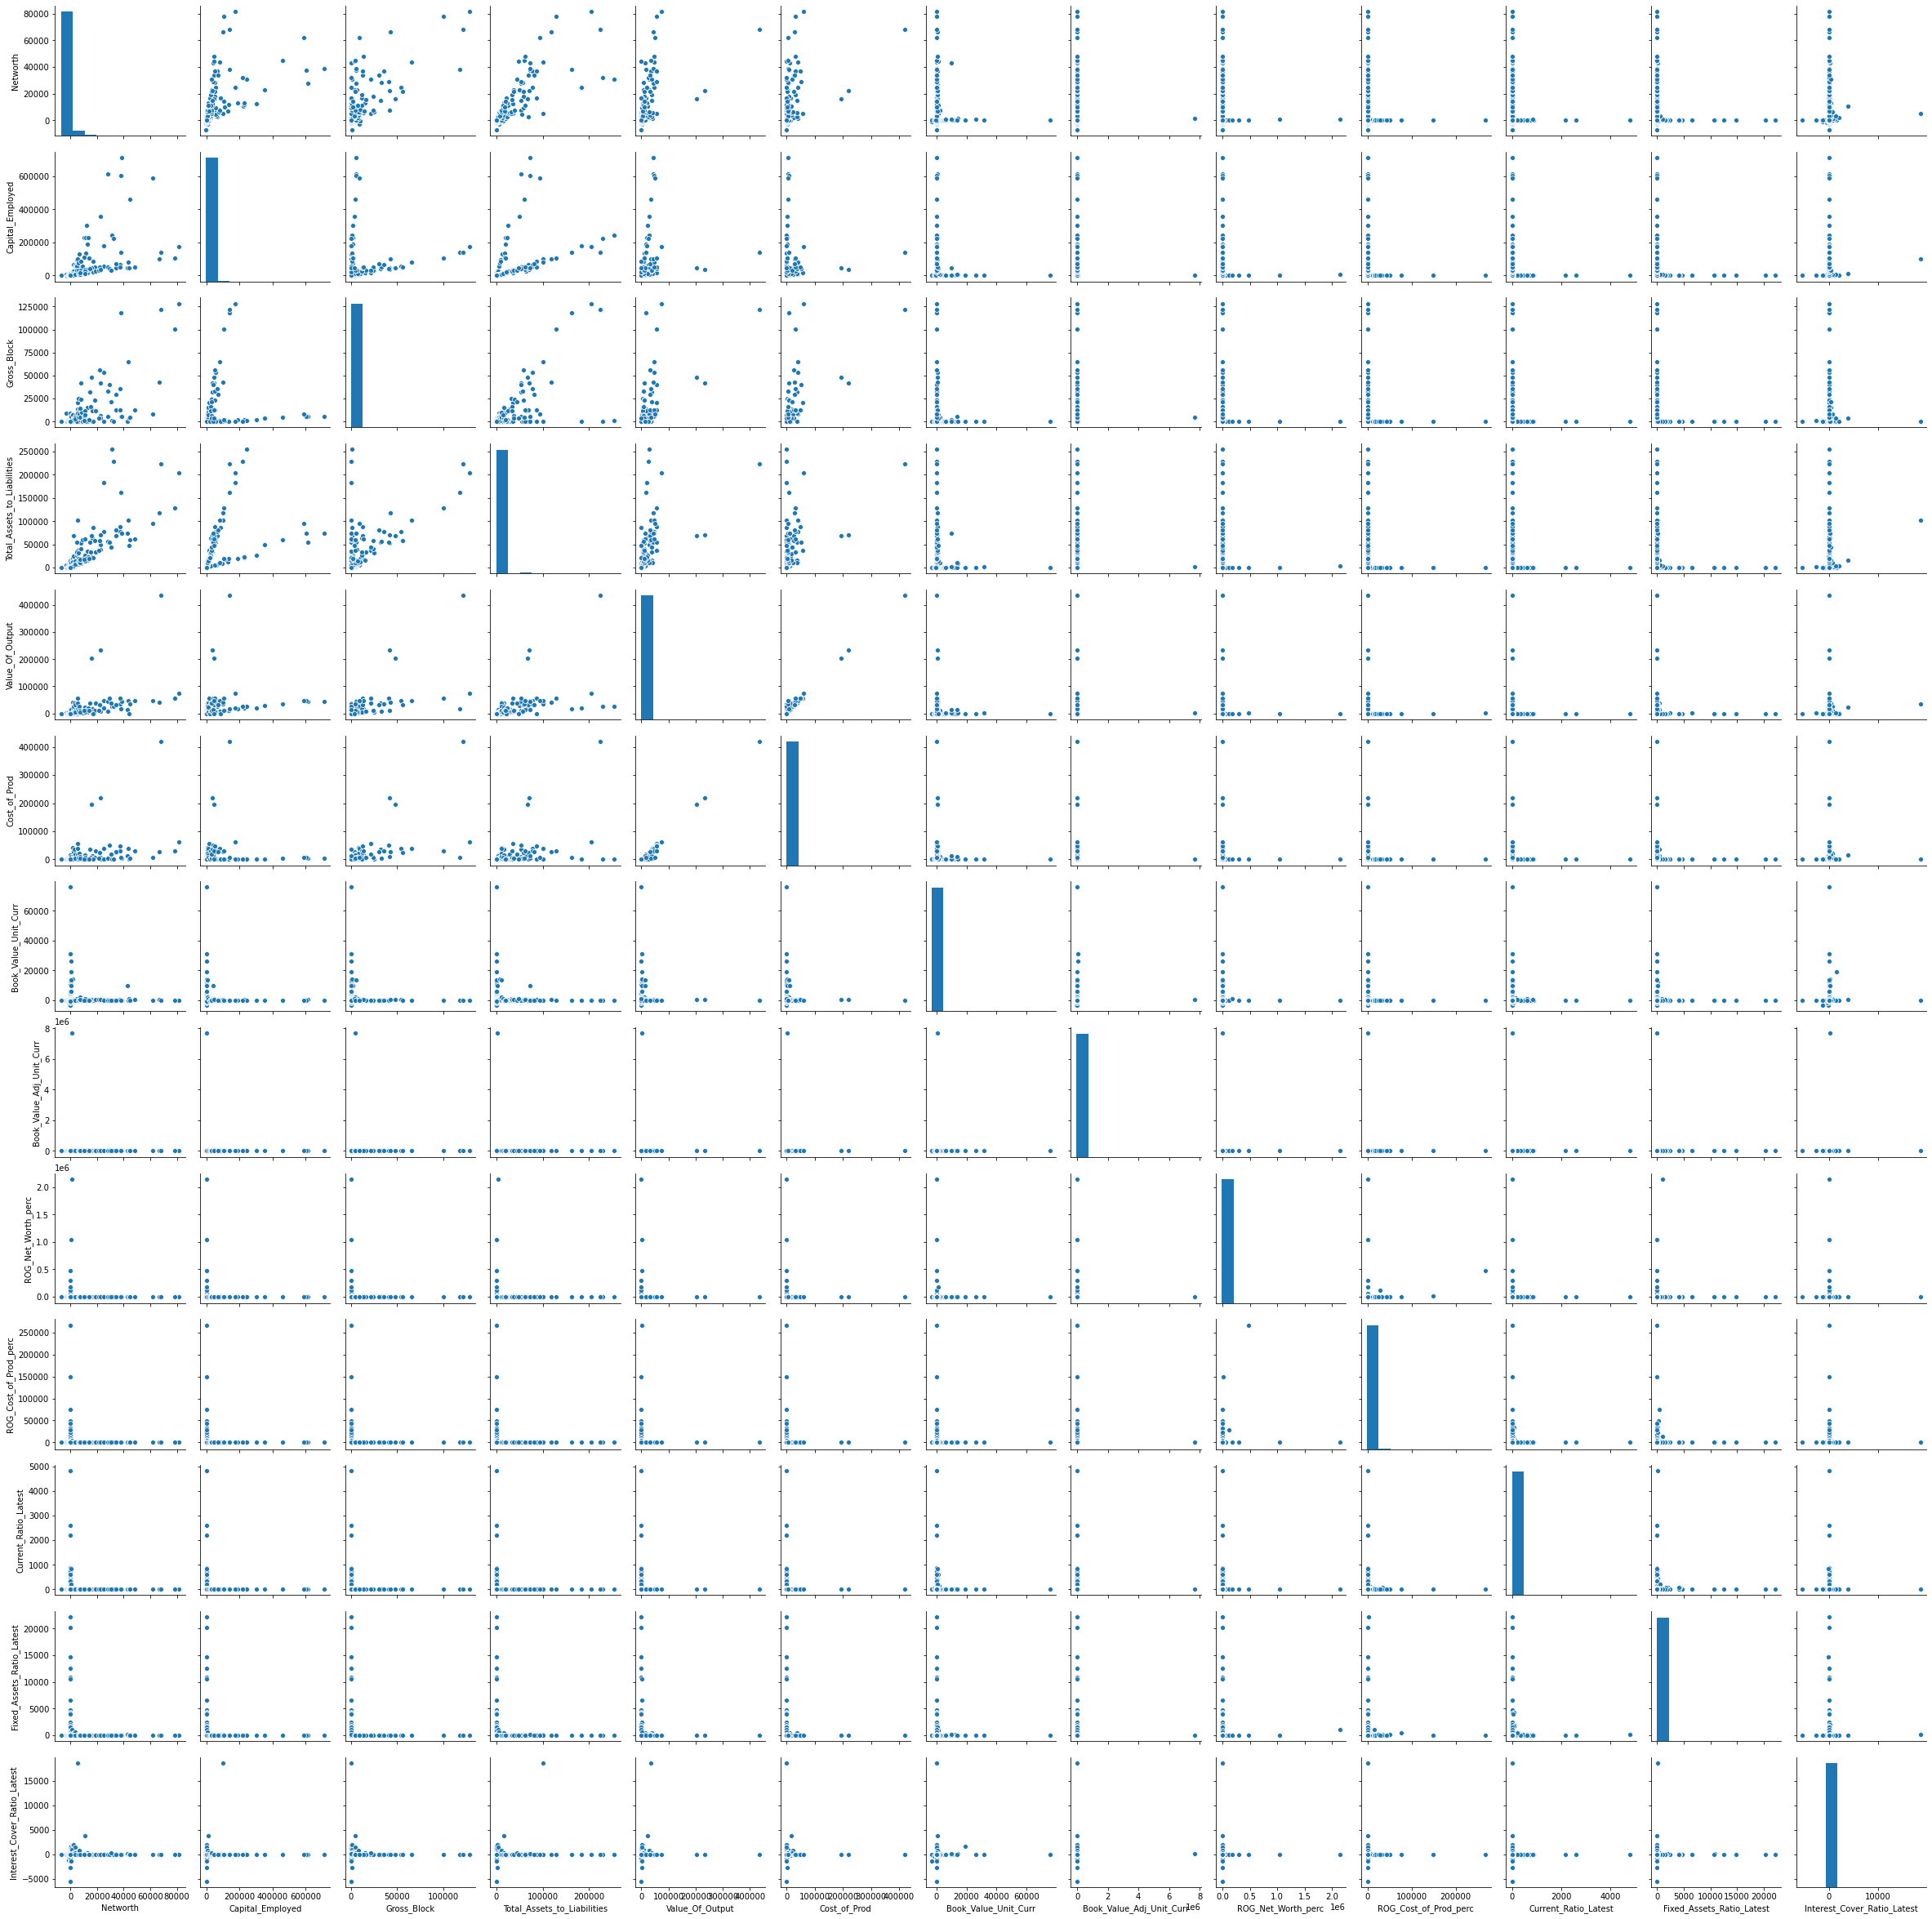

In [22]:
sns.pairplot(df[col]);

In [23]:
#Splitting the dataset into dependent and independent variables

df_X = df.drop('default', axis = 1)
df_Y = df['default']

In [24]:
#Missing value check

display(df.isnull().sum())

print('Total null values in the dataset: ', df.isnull().sum().sum())

Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block                              0
Net_Working_Capital                      0
Current_Assets                           0
Current_Liabilities_and_Provisions       0
Total_Assets_to_Liabilities              0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Prod                             0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PAT                             0
CP                                       0
Revenue_earn_in_forex                    0
Revenue_exp

Total null values in the dataset:  118


In [25]:
#Outliers check and count of them

Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
((df_X > UL) | (df_X < LL)).sum()

Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block                             540
Net_Working_Capital                     625
Current_Assets                          577
Current_Liabilities_and_Provisions      581
Total_Assets_to_Liabilities             574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Prod                            560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                                      816
Revenue_earn_in_forex           

In [26]:
#Checking for missing values in each row

rating[rating.isnull().sum(axis = 1) >=5]

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
2825,3240,G M Breweries,180.99,11.71,126.2,158.3,32.1,130.8,-7.65,39.86,...,NaN,NaN,NaN,NaN,0,6,23.0,2.98,5.53,0


In [27]:
#Getting the records which has NaN values 
rating[df.isnull().any(axis =1)].head(5)

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
24,5135,Alps Inds.,-647.90,39.11,-668.12,914.09,1080.44,816.58,425.64,544.97,...,-14.98,-8.51,-8.51,-15.21,59,34,NaN,0.63,0.62,1
97,3058,Ashima,-77.29,33.37,-363.21,204.64,539.72,205.81,130.00,171.47,...,-8.21,-10.91,-11.12,-12.93,37,47,NaN,1.10,0.86,1
153,24971,Runeecha Textile,-26.87,23.57,-5.27,46.09,48.79,92.84,35.22,43.39,...,-3976.92,-5969.23,-5969.23,-8769.23,6850,79,NaN,0.00,0.00,1
168,2891,Apple Credit,-20.57,19.42,-20.10,-2.85,10.34,0.45,-2.92,34.29,...,-230.77,-230.77,-230.77,-230.77,0,0,NaN,0.00,0.00,1
170,2681,Navcom Inds.,-19.26,8.23,-19.22,-19.22,0.00,0.01,-19.23,4.12,...,-0.78,-0.52,-0.52,-0.78,922,3053,NaN,0.58,35.09,1


In [28]:
#Converting the outliers to NaN values

df_X[((df_X > UL) | (df_X < LL))]= np.nan

In [29]:
#Sum of all null values
df_X.isnull().sum()

print('Total null values in the dataset: ', df_X.isnull().sum().sum())

Total null values in the dataset:  41473


In [30]:
#Concatenating the above datasets

df_3 = pd.concat([df_X, df_Y], axis =1 )

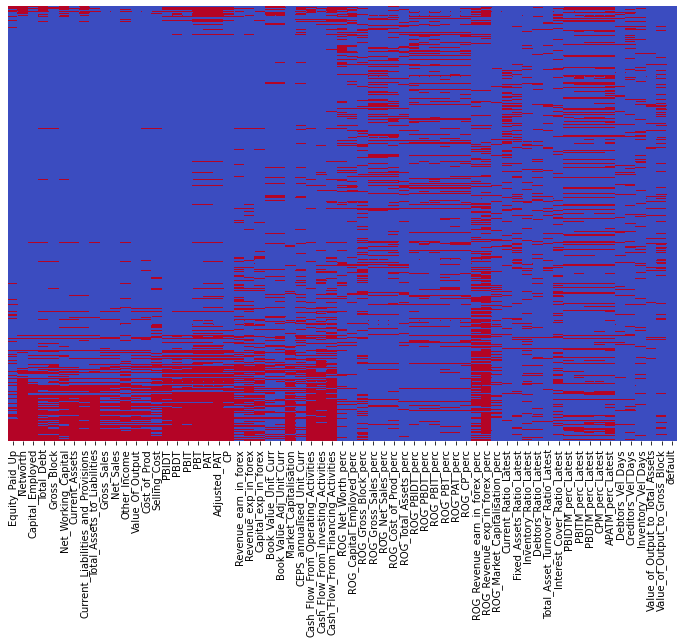

In [31]:
#Visual representation of missing values

plt.figure(figsize = (12,8))
sns.heatmap(df_3.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [32]:
#Inspecting null values by each row

df_3.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
5        9
6       37
7       34
8       24
9       27
10      20
11      34
12      21
13      35
14      27
15      35
16      34
17      31
18      12
19      22
20      23
21      16
22      33
23      38
24      28
25      21
26      14
27      11
28      14
29      33
30      27
31      22
32      21
33      15
34      30
35      28
36      22
37      30
38      11
39      25
40      25
41      27
42      16
43       4
44      23
45      21
46      34
47      27
48      29
49      10
50      28
51      28
52      16
53      35
54      31
55      20
56      17
57      17
58      10
59      12
60      23
61      20
62      29
63      15
64      19
65      16
66      32
67      26
68      15
69      17
70      23
71      16
72       9
73      11
74      34
75      18
76      21
77      26
78      20
79      18
80      20
81       5
82      23
83      10
84      22
85      21
86      14
87      14
88      24
89      23
90      26

In [33]:
temp = df_3[df_3.isnull().sum(axis = 1) >= 5]
temp.shape

(2618, 65)

In [34]:
temp['default'].value_counts()

0    2326
1     292
Name: default, dtype: int64

In [35]:
rating['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [36]:
292/388

0.7525773195876289

In [37]:
df_3.isnull().sum().sort_values(ascending = False)/df_3.index.size

ROG_Revenue_exp_in_forex_perc          0.450363
ROG_Revenue_earn_in_forex_perc         0.367262
Cash_Flow_From_Financing_Activities    0.280257
PAT                                    0.267429
Adjusted_PAT                           0.266035
PBT                                    0.262409
APATM_perc_Latest                      0.260457
Cash_Flow_From_Investing_Activities    0.244283
ROG_Gross_Block_perc                   0.231456
CP                                     0.227552
PBDT                                   0.227273
Cash_Flow_From_Operating_Activities    0.223369
ROG_Net_Worth_perc                     0.208310
Revenue_earn_in_forex                  0.205800
Interest_Cover_Ratio_Latest            0.202454
CPM_perc_Latest                        0.201060
PBIT                                   0.200781
PBITM_perc_Latest                      0.200223
PBDTM_perc_Latest                      0.194088
Capital_exp_in_forex                   0.193530
Revenue_exp_in_forex                   0

In [38]:
df_3.drop(['ROG_Revenue_exp_in_forex_perc','ROG_Revenue_earn_in_forex_perc','Cash_Flow_From_Financing_Activities','PAT','Adjusted_PAT','PBT','APATM_perc_Latest'],axis = 1,inplace = True)

In [39]:
predictors = df_3.drop('default', axis = 1)
response = df_3['default']

In [40]:
#Imputing the missing values using KNN imputer

imputer = KNNImputer(n_neighbors=10)
df_imputed = pd.DataFrame(imputer.fit_transform(predictors), columns = predictors.columns)
df_imputed.isnull().sum().sum()

0

In [41]:
df_4 = pd.concat([df_imputed, response], axis = 1)

In [42]:
df_4.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
0,23.746,68.469,71.144,49.995,172.258,0.000,40.500,40.388,109.600,0.000,...,0.000,0.000,0.000,0.000,0.0,0.0,45.0,0.00,0.00,1
1,10.871,-3.802,0.732,2.913,8.490,-1.722,3.732,5.449,6.181,1.353,...,-10.300,1.083,-0.644,0.942,29.0,101.0,2.0,0.31,0.24,1
2,19.431,181.316,377.636,51.842,217.240,72.327,235.171,106.390,519.595,392.130,...,21.145,11.835,8.404,6.782,97.0,69.1,0.0,-0.03,-0.26,1
3,18.326,64.958,179.874,48.934,149.370,49.616,119.568,47.866,245.231,136.955,...,-3.330,-7.210,4.278,2.807,93.0,63.0,2.0,0.24,1.90,1
4,24.055,166.635,352.921,56.499,199.574,37.377,233.286,86.089,513.386,38.720,...,19.508,9.733,5.471,9.519,67.2,65.0,0.0,0.01,0.05,1


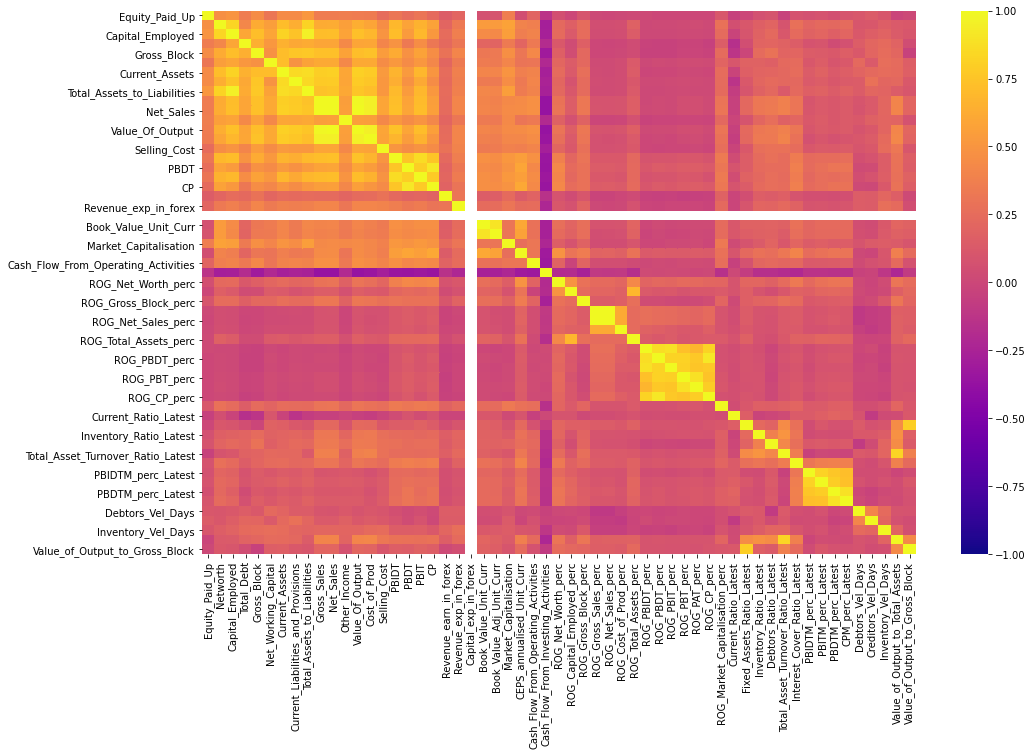

In [43]:
#Correlation plot of independent variables after imputing

plt.figure(figsize = (16,10))
cor_matrix = df_imputed.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1);

In [44]:
#Data Split: Split the data into train and test (70:30)

# Copy all the predictor variables into X dataframe
X = df_4.drop(['default'], axis=1)

# Copy target into the y dataframe. 
y = df_4['default']

In [45]:
# Split X and y into training and test set in 67:33 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42,stratify=y)
#statify = y is used to split the dataset into train and test with same proportion of 'yes' and 'no' category as in the original dataset

In [46]:
y_train.value_counts(normalize = True)

0    0.891757
1    0.108243
Name: default, dtype: float64

In [47]:
y_test.value_counts(normalize = True)
#Test and training sets have same proportion of '0' and '1'

0    0.891892
1    0.108108
Name: default, dtype: float64

In [48]:
#Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [49]:
Default_train.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_to_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'CP',
       'Revenue_earn_in_forex', 'Revenue_exp_in_forex', 'Capital_exp_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Prod_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc',
       'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc',
       'ROG_Market_Capitalisation_perc', 'Current_Ratio_Late

In [50]:
formula = 'default ~ Networth + Gross_Block + Value_Of_Output + Cost_of_Prod + Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ROG_Cost_of_Prod_perc+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest'

In [51]:
model_1 = SM.logit(formula = formula, data=Default_train).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.160175
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           11
Date:                Sun, 27 Jun 2021   Pseudo R-squ.:                  0.5328
Time:                        12:25:27   Log-Likelihood:                -384.74
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.349e-181
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0075      0.163      0.046      0.963      -0.312       0.327
Networth                       -0.0161      0.003     -5.232      0.000      -0.022      -0.010
Gross_Block                     0.0126      0.002      5.456      0.000       0.008       0.017
Value_Of_Output                -0.0214      0.004     -5.557      0.000      -0.029      -0.014
Cost_of_Prod                    0.0278      0.005      5.807      0.000       0.018       0.037
Book_Value_Unit_Curr           -0.0350      0.012     -2.974      0.003      -0.058      -0.012
Book_Value_Adj_Unit_Curr       -0.0365      0.013     -2.782      0.005      -0.062      -0.011
ROG_Net_Worth_perc             -0.0290      0.012     -2.328      0.020      -0.053      -0.005
ROG_Cost_of_Prod_perc          -0.0155      0.005     -3.178      0.001      -0.025      -0.006
Current_Ratio_Latest           -1.1891      0.148     -8.053      0.000      -1.479      -0.900
Fixed_Assets_Ratio_Latest      -0.1900      0.078     -2.425      0.015      -0.344      -0.036
Interest_Cover_Ratio_Latest    -0.2831      0.065     -4.338      0.000      -0.411      -0.155
===============================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [52]:
#Predictions on train dataset
y_prob_pred_train = model_1.predict(Default_train)

#Probability class
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.16:
        a=1
    else:
        a=0
    y_class_pred.append(a)

Accuracy of the train dataset:  90.09
Classification Report: 
               precision    recall  f1-score   support

           0      0.982     0.906     0.942      2142
           1      0.526     0.862     0.653       260

    accuracy                          0.901      2402
   macro avg      0.754     0.884     0.798      2402
weighted avg      0.932     0.901     0.911      2402

Confusion matrix: 



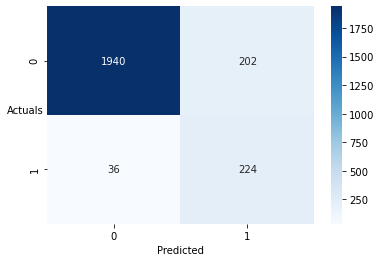

In [53]:
#Model evaluation of train dataset

print('Accuracy of the train dataset: ',(accuracy_score(Default_train['default'],y_class_pred)*100).round(2))
print('Classification Report: \n', classification_report(Default_train['default'],y_class_pred,digits=3))
print('Confusion matrix: \n')
sns.heatmap((confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

AUC for the Training Data: 0.948


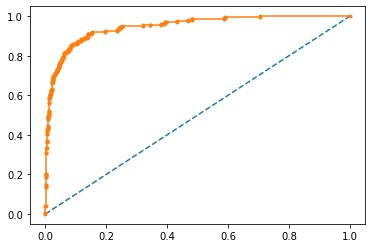

In [54]:
# AUC and ROC for the training data

# calculate AUC
auc = roc_auc_score(y_train,y_prob_pred_train)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,y_prob_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.show()

In [55]:
#Optimum threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimum threshold: ',optimal_threshold)

Optimum threshold:  0.10123051774723969


In [56]:
#Predictions on test data
y_prob_pred_test = model_1.predict(Default_test)

#Probability class
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.16:
        a=1
    else:
        a=0
    y_class_pred.append(a)

AUC for the Testing Data: 0.920


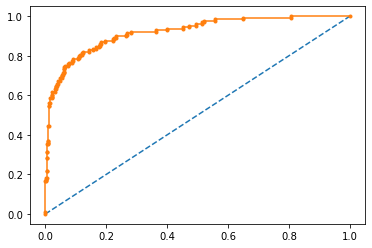

In [60]:
# AUC and ROC for the testing data

# calculate AUC
auc = roc_auc_score(y_test,y_prob_pred_test)
print('AUC for the Testing Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Testing Data')
plt.show()

Accuracy of the test dataset:  87.75
Classification Report: 
               precision    recall  f1-score   support

           0      0.972     0.888     0.928      1056
           1      0.461     0.789     0.582       128

    accuracy                          0.878      1184
   macro avg      0.717     0.839     0.755      1184
weighted avg      0.917     0.878     0.891      1184

Confusion matrix: 



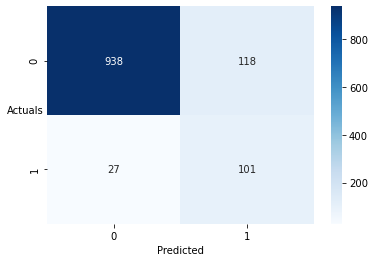

In [58]:
#Model evaluation of test data

print('Accuracy of the test dataset: ',(accuracy_score(Default_test['default'],y_class_pred)*100).round(2))
print('Classification Report: \n', classification_report(Default_test['default'],y_class_pred,digits=3))
print('Confusion matrix: \n')
sns.heatmap((confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);


In [59]:
df_4.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
0,23.746,68.469,71.144,49.995,172.258,0.000,40.500,40.388,109.600,0.000,...,0.000,0.000,0.000,0.000,0.0,0.0,45.0,0.00,0.00,1
1,10.871,-3.802,0.732,2.913,8.490,-1.722,3.732,5.449,6.181,1.353,...,-10.300,1.083,-0.644,0.942,29.0,101.0,2.0,0.31,0.24,1
2,19.431,181.316,377.636,51.842,217.240,72.327,235.171,106.390,519.595,392.130,...,21.145,11.835,8.404,6.782,97.0,69.1,0.0,-0.03,-0.26,1
3,18.326,64.958,179.874,48.934,149.370,49.616,119.568,47.866,245.231,136.955,...,-3.330,-7.210,4.278,2.807,93.0,63.0,2.0,0.24,1.90,1
4,24.055,166.635,352.921,56.499,199.574,37.377,233.286,86.089,513.386,38.720,...,19.508,9.733,5.471,9.519,67.2,65.0,0.0,0.01,0.05,1


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:black"> <u> FRA - Milestone 2
<a id='Problem_2'></a>

In [65]:
#Import necessary libraries

from sklearn.ensemble import RandomForestClassifier                            #Random forest classifier
from sklearn.model_selection import GridSearchCV                               #Grid search cross validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis           #LDA model
from sklearn.linear_model import LogisticRegression                            #Logistic Regression model

In [66]:
#Defining a function for predicting model accuracy
def model1(model):

    # Prediction on the training set and testing set
    ytrain_predict = model.predict(X_train)
    ytest_predict = model.predict(X_test)
    
    print('Accuracy of training data: ',(accuracy_score(y_train,ytrain_predict)*100).round(2)) #Training set accuracy
    print('Accuracy of testing data: ',(accuracy_score(y_test,ytest_predict)*100).round(2)) #Testing set accuracy

In [63]:
X_train.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,...,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
842,3.250,3.49,3.54,0.05,1.53,2.94,2.98,0.05,3.59,0.42,...,0.00,40.000,30.000,10.404,6.405,0.0,0.0,0.0,0.110,0.260
1057,4.750,5.29,5.39,0.02,0.75,3.56,3.62,0.06,5.45,1.88,...,-4.13,-1.120,-6.160,-2.610,-2.610,8.0,13.0,7.0,0.900,4.120
1595,13.060,13.50,13.50,0.00,0.00,13.47,13.62,0.15,13.65,0.12,...,0.00,1.600,1.600,1.600,1.060,51.8,0.0,29.9,0.460,0.000
100,16.096,-60.79,-58.30,2.46,18.66,-84.10,7.69,91.79,33.49,0.76,...,0.00,9.928,4.234,4.766,3.793,81.5,15.0,69.0,0.020,0.060
1191,4.000,5.95,20.62,14.33,7.76,7.38,22.22,14.83,35.45,142.80,...,3.42,4.290,3.990,3.120,2.100,53.0,28.0,0.0,1.692,6.746


In [67]:
#Logistic Regression model
grid={'penalty':['l1','l2','elastic-net','none'],
      'solver':['sag','lbfgs','liblinear','newton-dg','saga'],
      'tol':[0.0001,0.000001]}
#Building the model
model_lg = LogisticRegression(max_iter=10000, verbose = True)
grid_search = GridSearchCV(estimator = model_lg, param_grid = grid, cv = 3,n_jobs=-1,scoring ='f1')
#Fit the model
grid_search.fit(X_train, y_train)
#Finding best parameters
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)
best_model1 = grid_search.best_estimator_
grid_search

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 41 seconds
{'penalty': 'l1', 'solver': 'saga', 'tol': 1e-06} 



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.6s finished


LogisticRegression(max_iter=10000, penalty='l1', solver='saga', tol=1e-06,
                   verbose=True)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elastic-net', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear', 'newton-dg',
                                    'saga'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [68]:
model1(best_model1)

Accuracy of training data:  95.09
Accuracy of testing data:  93.67


In [73]:
#Random Forest model

#Creating grid search for finding out optimal number of values for the hyper parameter

param_grid1 = {
    'max_depth': [10,15,20],
    'max_features': [5,10,15,20],
    'min_samples_leaf': [20,30,40],
    'min_samples_split': [60,90,120], 
    'n_estimators': [100,150,200]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid1, cv = 3)

#Finding the best parameters for proceeding with the model
grid_search_rfcl.fit(X_train, y_train)
print(grid_search_rfcl.best_params_)
best_model2 = grid_search_rfcl.best_estimator_

{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 30, 'min_samples_split': 60, 'n_estimators': 150}


In [74]:
grid_search_rfcl

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [60, 90, 120],
                         'n_estimators': [100, 150, 200]})

In [75]:
model1(best_model2)

Accuracy of training data:  96.75
Accuracy of testing data:  96.62


In [79]:
#Feature importance
print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False).head(10))

                                        Imp
Networth                           0.304146
Book_Value_Unit_Curr               0.232806
Book_Value_Adj_Unit_Curr           0.201760
Current_Ratio_Latest               0.055493
Capital_Employed                   0.047661
CEPS_annualised_Unit_Curr          0.019512
PBIDT                              0.018357
CP                                 0.015574
Total_Asset_Turnover_Ratio_Latest  0.013238
PBDT                               0.009857


In [86]:
print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False).tail(10))

                                          Imp
ROG_PBIT_perc                        0.000342
Cash_Flow_From_Investing_Activities  0.000331
Inventory_Ratio_Latest               0.000264
Value_of_Output_to_Total_Assets      0.000246
Selling_Cost                         0.000224
ROG_CP_perc                          0.000212
ROG_Capital_Employed_perc            0.000149
Revenue_exp_in_forex                 0.000145
Revenue_earn_in_forex                0.000025
Capital_exp_in_forex                 0.000000


In [80]:
#Linear Discriminant Analysis

grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.0001,0.00001]}
#Building the model
model2 = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = model2, param_grid = grid, cv = 3,n_jobs=-1)
#Fit the model on training data
grid_search.fit(X_train, y_train)
#Finding best parameters
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)
best_model3 = grid_search.best_estimator_
grid_search

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [82]:
model1(best_model3)

Accuracy of training data:  93.05
Accuracy of testing data:  92.4


In [83]:
#Performance metrics

def performance(model,xtrain,ytrain,xtest,ytest):
    # Prediction on the training set and testing set
    ytrain_predict = model.predict(xtrain) 
    ytest_predict = model.predict(xtest)
    # Getting the probabilities on the train set and  test set
    ytrain_predict_prob=model.predict_proba(xtrain)
    ytest_predict_prob=model.predict_proba(xtest)
      
    # AUC and ROC for the train data
    # calculate AUC
    auc = roc_auc_score(ytrain,ytrain_predict_prob[:,1])
    print('AUC for the Training Data: %.3f' % auc)
    #  calculate roc curve
    fpr, tpr, thresholds = roc_curve(ytrain,ytrain_predict_prob[:,1])
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.',label = 'Training Data')
    # AUC and ROC for the test data
    # calculate AUC
    auc = roc_auc_score(ytest,ytest_predict_prob[:,1])
    print('AUC for the Test Data: %.3f' % auc)
    #  calculate roc curve
    fpr, tpr, thresholds = roc_curve(ytest,ytest_predict_prob[:,1])
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.',label='Test Data')
    # show the plot
    plt.legend(loc='best')
    plt.show()
    
    f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize =(12,6))
    #Plotting confusion matrix for the training and testing data
    plot_0 = sns.heatmap((confusion_matrix(ytrain,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
    a[0][0].set_title('Training Data')
    plot_1 = sns.heatmap((confusion_matrix(ytest,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
    a[0][1].set_title('Test Data');
    
    print('Classification Report of the training data:\n\n',classification_report(ytrain, ytrain_predict),'\n')
    print('Classification Report of the test data:\n\n',classification_report(ytest, ytest_predict),'\n')   

AUC for the Training Data: 0.993
AUC for the Test Data: 0.989


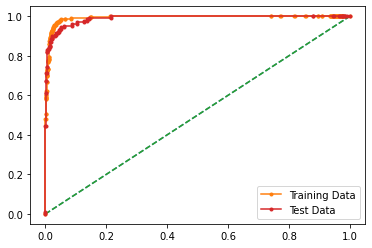

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2142
           1       0.91      0.78      0.84       260

    accuracy                           0.97      2402
   macro avg       0.94      0.89      0.91      2402
weighted avg       0.97      0.97      0.97      2402
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1056
           1       0.95      0.73      0.82       128

    accuracy                           0.97      1184
   macro avg       0.96      0.86      0.90      1184
weighted avg       0.97      0.97      0.96      1184
 



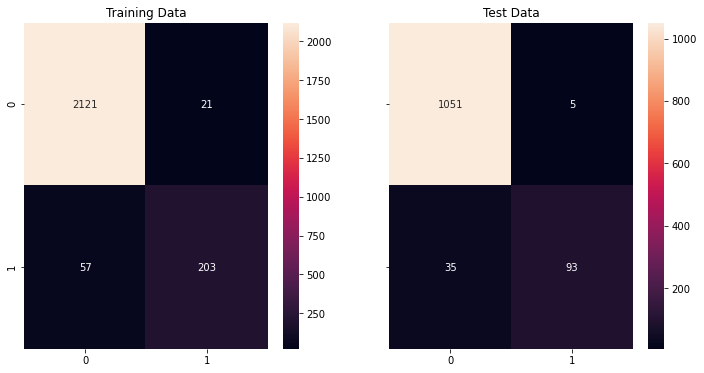

In [84]:
#Performance metrics for Random Forest

performance(best_model2,X_train,y_train,X_test,y_test)

AUC for the Training Data: 0.947
AUC for the Test Data: 0.938


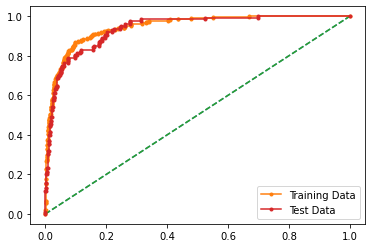

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.94      0.99      0.96      2142
           1       0.83      0.45      0.58       260

    accuracy                           0.93      2402
   macro avg       0.89      0.72      0.77      2402
weighted avg       0.93      0.93      0.92      2402
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1056
           1       0.80      0.40      0.53       128

    accuracy                           0.92      1184
   macro avg       0.86      0.69      0.74      1184
weighted avg       0.92      0.92      0.91      1184
 



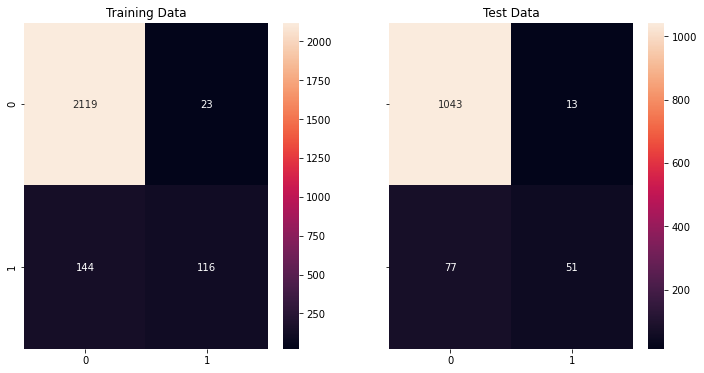

In [85]:
#Performance metrics for LDA

performance(best_model3,X_train,y_train,X_test,y_test)